<a href="https://colab.research.google.com/github/BANADDA/whitefly_object-classification/blob/main/whitefly_25x25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [49]:
%cd /content/gdrive/MyDrive/images

/content/gdrive/MyDrive/images


In [50]:
from numpy.random import seed
seed(1)
import os
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Conv3D
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from time import strftime, localtime

In [51]:
from sklearn.metrics import confusion_matrix

# Model definition

In [52]:
# Instatiate model
model = Sequential()

In [53]:
model.add(Conv2D(256, kernel_size=(5, 5), input_shape=(25, 25, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# # model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.5))
# # model.add(Dense(8, activation='relu'))
# # model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 25, 25, 256)       19456     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 256)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 256)         1638656   
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 256)         590080    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 256)       

In [55]:
model.compile(optimizer=SGD(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [56]:
paths = "/content/gdrive/MyDrive/weights/"+strftime("%m-%d-%Y_%H:%M:%S")+"_weights.{epoch:02d}.h5"
paths

'/content/gdrive/MyDrive/weights/07-01-2022_07:46:42_weights.{epoch:02d}.h5'

In [99]:
 paths = "/content/gdrive/MyDrive/weights/weights.{epoch:02d}.h5"
 print(paths)
monitor_progress = ModelCheckpoint(paths,monitor="val_accuracy", verbose=1, save_best_only=True)

/content/gdrive/MyDrive/weights/weights.{epoch:02d}.h5


# Data Preparation

In [58]:
base_dir ='/content/gdrive/MyDrive/images/extracted_25x25'
traindir = os.path.join(base_dir,"train_balanced")
validationdir = os.path.join(base_dir,"validation")
testdir = os.path.join(base_dir,"test") 
patch_size=25

In [59]:
traindatagen = ImageDataGenerator(horizontal_flip=True,rotation_range=20,rescale=1/225.)
validationdatagen = ImageDataGenerator(rescale=1/225.)
testdatagen = ImageDataGenerator(rescale=1/225.)

In [60]:
traingen = traindatagen.flow_from_directory(
                                directory=traindir,
                                target_size=(patch_size,patch_size),
                                batch_size = 8,
                                class_mode='binary')
validationgen = validationdatagen.flow_from_directory(
                                directory=validationdir,
                                target_size=(patch_size,patch_size),
                                batch_size = 8,
                                class_mode='binary')
testgen = testdatagen.flow_from_directory(
                                directory=testdir,
                                target_size=(patch_size,patch_size),
                                batch_size = 8,                                
                                class_mode='binary')

Found 2398 images belonging to 2 classes.
Found 649 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


In [61]:
validationgen.class_indices

{'negative': 0, 'positive': 1}

In [92]:
# x,y = traingen

In [93]:
import numpy as np
# x = np.concatenate([traingen.next()[0] for i in range(traingen.__len__())])
# y = np.concatenate([traingen.next()[1] for i in range(traingen.__len__())])

In [94]:
# def train_step(self, data):
#         # Unpack data
#         x, y = data

In [95]:
# traingen.__len__()

In [66]:
1649/8

206.125

In [ ]:
history = model.fit(
                    traingen,
                    epochs=150,
                    callbacks=[monitor_progress],
                    validation_data=validationgen)

Epoch 1/150
300/300 [==============================] - ETA: 0s - loss: 0.5469 - accuracy: 0.7127
Epoch 1: val_accuracy improved from 0.46687 to 0.51310, saving model to /content/gdrive/MyDrive/weights/weights.01.h5
300/300 [==============================] - 49s 164ms/step - loss: 0.5469 - accuracy: 0.7127 - val_loss: 0.7045 - val_accuracy: 0.5131
Epoch 2/150
300/300 [==============================] - ETA: 0s - loss: 0.5431 - accuracy: 0.7269
Epoch 2: val_accuracy improved from 0.51310 to 0.54854, saving model to /content/gdrive/MyDrive/weights/weights.02.h5
300/300 [==============================] - 51s 168ms/step - loss: 0.5431 - accuracy: 0.7269 - val_loss: 0.6991 - val_accuracy: 0.5485
Epoch 3/150
300/300 [==============================] - ETA: 0s - loss: 0.5395 - accuracy: 0.7523
Epoch 3: val_accuracy improved from 0.54854 to 0.56703, saving model to /content/gdrive/MyDrive/weights/weights.03.h5
300/300 [==============================] - 48s 160ms/step - loss: 0.5395 - accuracy: 0.

In [ ]:
model.evaluate(testgen)

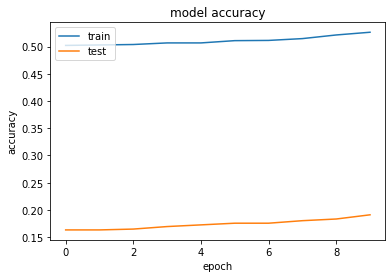

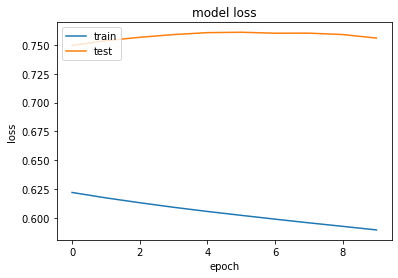

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("acc_31_05_19.png")
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("loss_31_05_19.png")
plt.show()

In [101]:
testgen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [102]:
model.predict (testgen)

array([[0.46057868],
       [0.5869606 ],
       [0.5487985 ],
       [0.5062269 ],
       [0.5480211 ],
       [0.47059268],
       [0.5125758 ],
       [0.4982795 ],
       [0.7527586 ],
       [0.5714222 ],
       [0.5604207 ],
       [0.5262432 ],
       [0.55281126],
       [0.7779657 ],
       [0.53079677],
       [0.5278084 ],
       [0.5219431 ],
       [0.59476864],
       [0.44487494],
       [0.72613394],
       [0.5542872 ],
       [0.5545819 ],
       [0.5993801 ],
       [0.54131806],
       [0.54539573],
       [0.44152516],
       [0.46454117],
       [0.49931845],
       [0.47660202],
       [0.49892792],
       [0.5551485 ],
       [0.46766752],
       [0.59643304],
       [0.46036398],
       [0.54131806],
       [0.538082  ],
       [0.7293996 ],
       [0.58341455],
       [0.61031735],
       [0.55950636],
       [0.44282195],
       [0.77626   ],
       [0.51904386],
       [0.6027519 ],
       [0.5293075 ],
       [0.8151138 ],
       [0.6282755 ],
       [0.503

# Evaluation

In [90]:
import cv2
import glob
import random
import numpy as np

In [76]:
test_model = load_model("weights_25/weights.176.h5")

OSError: ignored

In [77]:
root_img_path ="/content/gdrive/MyDrive/My Drive/My Drive/images/extracted_25x25/test"

In [78]:
def load_images(img_path):
    return np.array([cv2.imread(img_path+file) for file in os.listdir(img_path)])

In [79]:
def get_label(prediction,idx):
    if prediction[idx]<0.5:
        return "Negative"
    return "Positive"

In [80]:
def get_neg_class(prediction_class, N):
    arr = []
    while len(arr)<N+1:
        idx = random.randint(0,len(prediction_class)-1)
        if prediction_class[idx]<0.5 and idx not in arr:
            arr.append(idx)
    return arr

In [81]:
def get_pos_class(prediction_class, N):
    arr = []
    while len(arr)<N+1:
        idx = random.randint(0,len(prediction_class)-1)
        if prediction_class[idx]>=0.5 and idx not in arr:
            arr.append(idx)
    return arr

In [82]:
# Create positive and negative batch for predictions
positive_batch = load_images(os.path.join(root_img_path,"positive/"))
negative_batch = load_images(os.path.join(root_img_path,"negative/"))

In [83]:
# Predictions for positive class
predicted_pos = model.predict_on_batch(positive_batch)
len(predicted_pos)

76

In [84]:
# Predictions for negative class
predicted_neg = model.predict_on_batch(negative_batch)
len(predicted_neg)

354

In [85]:
# Get TP(True Positives) and FN(False Negatives)
TP = [p for p in predicted_pos if p >=0.5]
FN = [p for p in predicted_pos if p<0.5]
print("Positive examples classified positive (TP): ",len(TP))
print("Positive examples classified negative (FN): ",len(FN))

Positive examples classified positive (TP):  76
Positive examples classified negative (FN):  0


In [86]:
# Get TN(True Negatives) and FP(False Positives)
FP = [p for p in predicted_neg if p >=0.5]
TN = [p for p in predicted_neg if p<0.5]
print("Negative examples classified positive (FP): ",len(FP))
print("Negative examples classified negative (TN): ",len(TN))

Negative examples classified positive (FP):  354
Negative examples classified negative (TN):  0


In [87]:
def get_confusion_matrix(tp, fp, tn, fn):
    pr = tp/(tp+fp)
    rc = tp/(tp+fn)
    f1_score = 2*((pr*rc)/(pr+rc))
    print("TP \t FP \t TN \t FN\n")
    print(str(tp)+"\t"+str(fp)+"\t"+str(tn)+"\t"+str(fn))
    return pr, rc, f1_score

In [88]:
# Confusion matrix
Precision, Recall, F1_Score = get_confusion_matrix(len(TP),len(FP),len(TN),len(FN))
print("\n")
print("Precision:\t",f'{Precision:9.4f}')
print("Recall:\t\t",f'{Recall:9.4f}')
print("F1_Score:\t",f'{F1_Score:9.4f}')

TP 	 FP 	 TN 	 FN

76	354	0	0


Precision:	    0.1767
Recall:		    1.0000
F1_Score:	    0.3004


# Visualization

In [89]:
# Get N random examples from each class
N= 10
true_pos_indices = get_pos_class(predicted_pos, N)
false_neg_indices = get_neg_class(predicted_pos, N)
false_pos_indices = get_pos_class(predicted_neg, N)
true_neg_indices = get_neg_class(predicted_neg, N)

KeyboardInterrupt: ignored

In [ ]:
# Display N patches
def display_patches(class_batch,pred_class,patch_indices, N):
    plt.figure(figsize=(20,20))
    for n in range(1,N+1):
        plt.subplot(1,N,n),
        plt.title(get_label(pred_class,patch_indices[n-1]))
        plt.imshow(class_batch[patch_indices[n-1]])

In [ ]:
# Show N True Positive examples
display_patches(positive_batch, predicted_pos, true_pos_indices, N)

In [ ]:
# Show N False Negative examples
display_patches(positive_batch, predicted_pos, false_neg_indices, N)

In [ ]:
# Show N True Negative examples
display_patches(negative_batch, predicted_neg, true_neg_indices, N)

In [ ]:
# Show N False Positive examples
display_patches(negative_batch, predicted_neg, false_pos_indices, N)